# Uber Data Analysis

Outlined below is an analysis of raw Uber data from April 2014

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#e9e5f3'

Populating the interactive namespace from numpy and matplotlib


## Load Data

In [2]:
filename = "./uber-raw-data-apr14.txt"
uber_data = pd.read_csv(filename)

In [3]:
uber_data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


## Data Cleaning and Preperation
- Identify and remove NaN values
- Identify any other issues i.e. duplicates, incorrect string formatting

In [4]:
#create df to count how many null objects there are
nan_df = uber_data[uber_data.isnull().any(axis=1)]
nan_df[:]

,Date/Time,Lat,Lon,Base


There are no NaN values

In [5]:
uber_data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

Date/Time column needs to be converted from a string to to_datetime

In [6]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

<b>Add Date Columns</b>

In [7]:
#return the day
def get_day(x):
    return x.day

uber_data['Day of Month'] = uber_data['Date/Time'].apply(lambda x: get_day(x))

In [8]:
uber_data.tail()

,Date/Time,Lat,Lon,Base,Day of Month
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [9]:
#Return the weekday
def get_weekday(x):
    return x.weekday()

uber_data['Day of Week'] = uber_data['Date/Time'].apply(lambda x: get_weekday(x))

In [10]:
#return the hour
def get_hour(x):
    return x.hour

uber_data['Hour'] = uber_data['Date/Time'].apply(lambda x: get_hour(x))

In [11]:
uber_data.tail()

,Date/Time,Lat,Lon,Base,Day of Month,Day of Week,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


##### The spacing between the 'Day of Month' and 'Day of Week' columns was leading to errors when trying to call on each column. Therefor, I renamed each.

In [12]:
uber_data.rename(columns={'Day of Month':'dom'}, inplace=True)
uber_data.rename(columns={'Day of Week':'dow'}, inplace=True)

 ## Analysis

#### Day of Month

Text(0.5, 1.0, 'Frequency by DoM - Uber - April 2014')

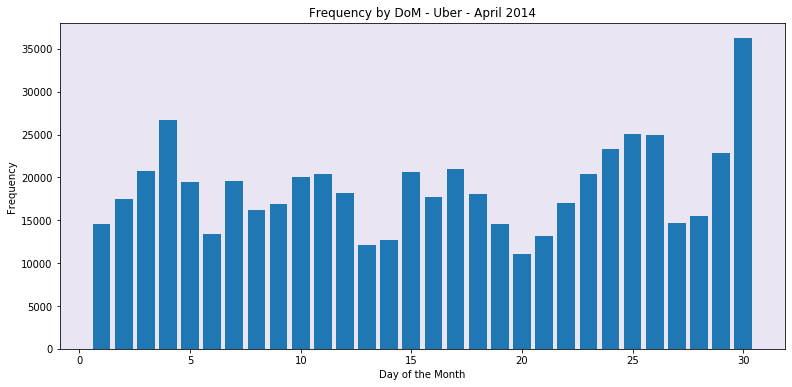

In [26]:
width = 13
height = 6
plt.figure(figsize=(width, height))

hist(uber_data.dom, bins=30, rwidth=.8, range=(0.5,30.5))

xlabel('Day of the Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - April 2014')

In [14]:
#I could do this to get the exact number Frequency for each but
#not comfortable counting a datetime column
#dt = uber_data.groupby('dom').count()['Date/Time']

#Better way
def count_rows(x):
    return len(x)

frequency = uber_data.groupby('dom').apply(count_rows)

#not sure why I had to exclude the functions argument?

In [15]:
frequency_sorted = frequency.sort_values()

Text(0.5, 1.0, 'Frequency by DoM - Uber - April 2014')

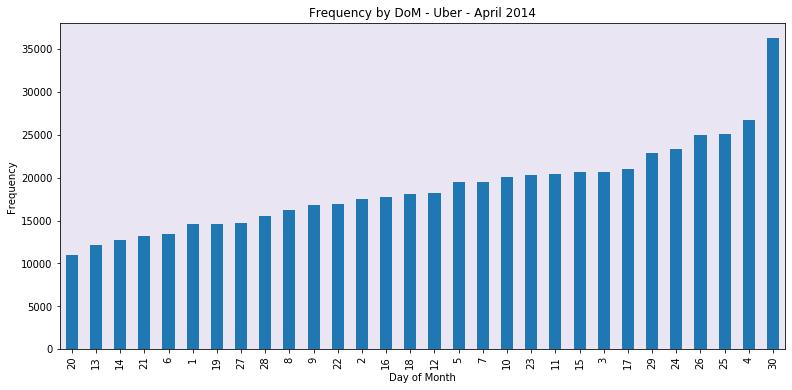

In [16]:
plt.figure(figsize=(width, height))

frequency_sorted.plot.bar()

xlabel('Day of Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - April 2014')

#### Hour

Text(0.5, 1.0, 'Frequency by Hour - Uber - April 2014')

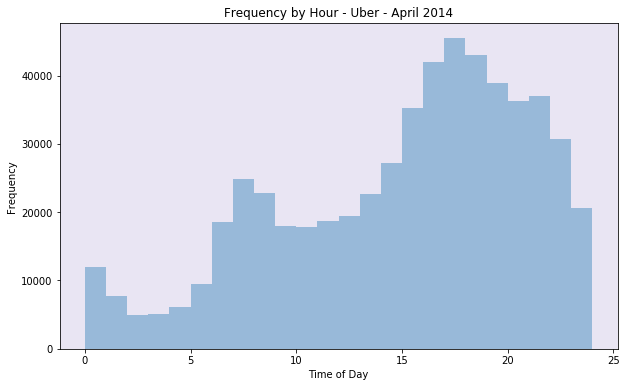

In [17]:
width2=10
plt.figure(figsize=(width2, height))

hist(uber_data.Hour, bins=24, range=(0,24),alpha=.4)

xlabel('Time of Day')
ylabel('Frequency')
title('Frequency by Hour - Uber - April 2014')

#### Weekday

Text(0.5, 1.0, 'Frequency by Day - Uber - April 2014')

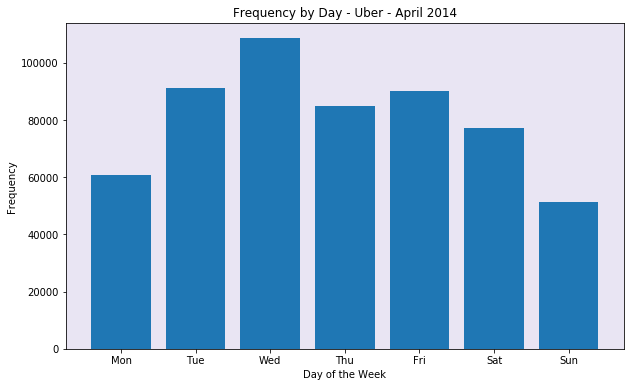

In [18]:
plt.figure(figsize=(width2, height))

hist(uber_data.dow, bins=7, range=(-0.5,6.5), rwidth=.8,)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

xlabel('Day of the Week')
ylabel('Frequency')
title('Frequency by Day - Uber - April 2014')

### Cross Analysis (Hour, Dow)

In [19]:
#Creat a series for each hour and within it it displays the dow of the week
uber_data.groupby('dow Hour'.split()).apply(count_rows).unstack()


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dow,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


In [20]:
by_hour_dow = uber_data.groupby('dow Hour'.split()).apply(count_rows).unstack()

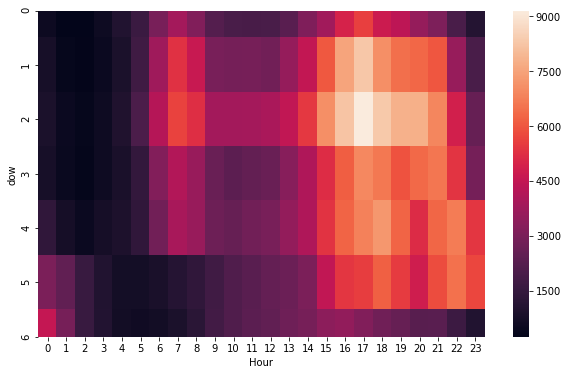

In [21]:
plt.figure(figsize=(width2, height))
sns.heatmap(by_hour_dow)

### By Lat and Long

''

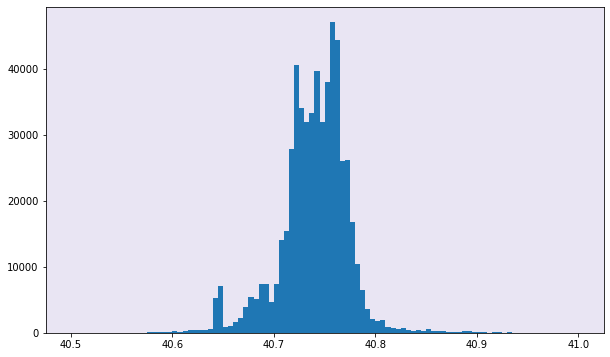

In [22]:
#Lat
plt.figure(figsize=(width2, height))
hist(uber_data.Lat, bins=100, range=(40.5,41))
;

''

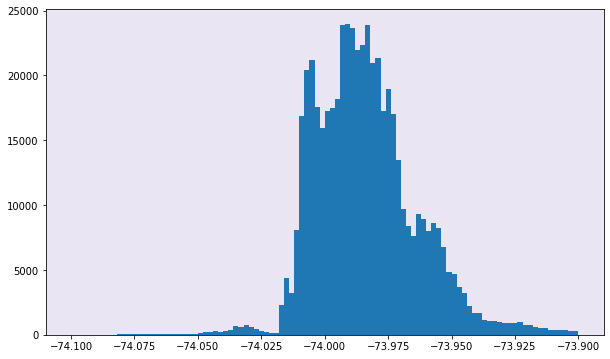

In [23]:
plt.figure(figsize=(width2, height))
hist(uber_data.Lon, bins=100, range=(-74.1,-73.9))
;

''

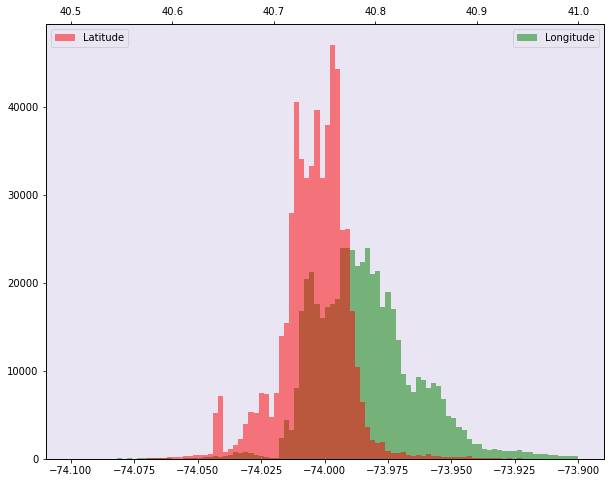

In [34]:
plt.figure(figsize=(width2, height))

hist(uber_data.Lon, bins=100, range=(-74.1,-73.9),color='green',alpha=.5)
legend(['Longitude'],loc='upper right')
twiny()
hist(uber_data.Lat, bins=100, range=(40.5,41), color = 'red',alpha=.5)
legend(['Latitude'],loc='upper left')
;


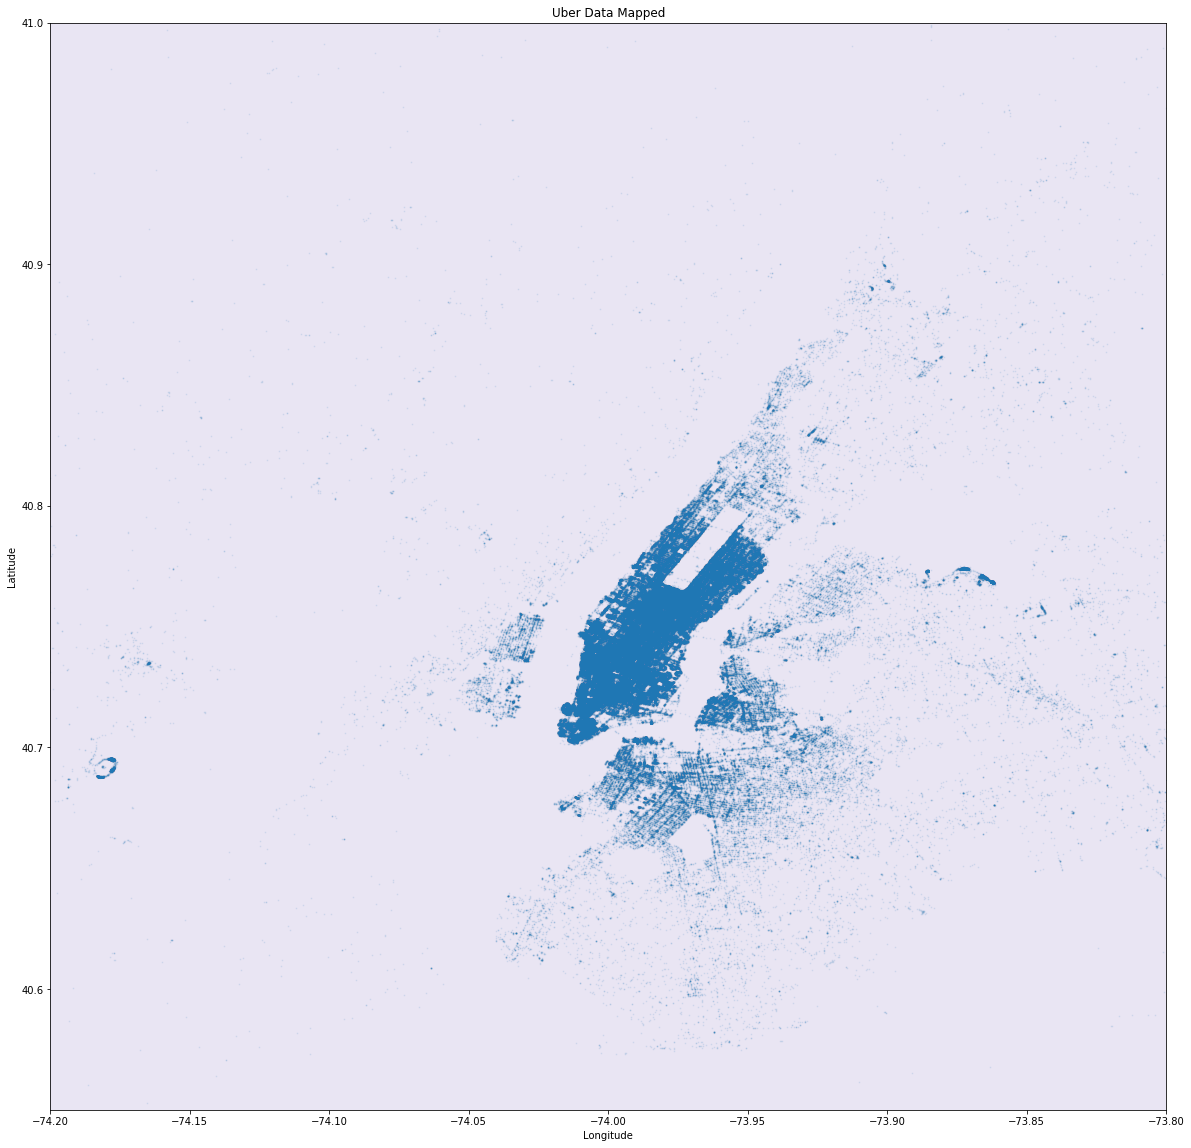

In [51]:
width3 = 20
height2 = 20
plt.figure(figsize=(width3, height2))

plt.scatter("Lon", "Lat", data = uber_data, alpha = 0.1, c = 'C0',edgecolor = 'face', s=.5)

xlim(-74.2,-73.8)
ylim(40.55,41)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Uber Data Mapped')



plt.show()